In [601]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import statsmodels.api as sm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from patsy import dmatrices
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

In [420]:
%matplotlib inline

In [421]:
data=pd.read_json('train.json')

In [422]:
data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [423]:
levels=['interest_level','bedrooms','bathrooms','price','display_address','features','photos','manager_id']

In [424]:
level1=data[levels]

In [425]:
level1.head(20)

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id
10,medium,3,1.5,3000,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc
10000,low,2,1.0,5465,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",[https://photos.renthop.com/2/7150865_be3306c5...,7533621a882f71e25173b27e3139d83d
100004,high,1,1.0,2850,W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",[https://photos.renthop.com/2/6887163_de85c427...,d9039c43983f6e564b1482b273bd7b01
100007,low,1,1.0,3275,East 49th Street,"[Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6888711_6e660cee...,1067e078446a7897d2da493d2f741316
100013,low,4,1.0,3350,West 143rd Street,[Pre-War],[https://photos.renthop.com/2/6934781_1fa4b41a...,98e13ad4b495b9613cef886d79a6291f
100014,medium,4,2.0,7995,West 18th Street,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651
100016,low,2,1.0,3600,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",[https://photos.renthop.com/2/6930771_7e3622b6...,01287194f20de51872e81f660def4784
100020,low,1,2.0,5645,West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",[https://photos.renthop.com/2/6867392_b18283f6...,e6472c7237327dd3903b3d6f6a94515a
100026,medium,1,1.0,1725,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f
100027,low,4,2.0,5800,522 E 11th,"[Dishwasher, Hardwood Floors]",[https://photos.renthop.com/2/6814332_e19a8552...,23a01ea7717b38875f5b070282d1b9d2


### We are going to convert the medium category variable to high category variable, so that we have only two categories ie Low and high

In [426]:
level2=level1[level1['interest_level']=='medium']
level2.shape[0]
level2

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id
10,medium,3,1.5,3000,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc
100014,medium,4,2.0,7995,West 18th Street,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651
100026,medium,1,1.0,1725,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f
100051,medium,0,1.0,2350,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0
100063,medium,2,1.0,2999,"E 30th St,","[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a
10007,medium,4,2.0,7400,W 18 St.,"[Balcony, Doorman, Elevator, Fitness Center, T...",[https://photos.renthop.com/2/7120132_8e47916c...,0cff4a2a147d81e51ae8a91289e129f7
100075,medium,1,1.0,2295,E 81st St.,"[Dishwasher, Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6921632_563cdcee...,4f9b376a972b863bbfbdcdc8d717fa4e
100083,medium,0,1.0,2750,250 West 88th Street,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",[https://photos.renthop.com/2/6904268_657c825a...,92ff104c90a9c40d153ea970e19c27c1
100084,medium,2,1.0,3500,W 93 St.,"[Dining Room, Balcony, Doorman, Elevator, Terr...",[https://photos.renthop.com/2/6821944_b0efc094...,bce75205499f22e47b0c1aa94e09131c
10010,medium,0,1.0,2396,W 34 St.,"[Roof Deck, Doorman, Elevator, Fitness Center,...",[https://photos.renthop.com/2/7230670_5757b0e5...,6a6c75bdb10af785bebd2a09a53fc4c2


In [427]:
level2.interest_level='high'

C:\Anaconda\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [428]:
level2

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id
10,high,3,1.5,3000,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc
100014,high,4,2.0,7995,West 18th Street,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651
100026,high,1,1.0,1725,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f
100051,high,0,1.0,2350,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0
100063,high,2,1.0,2999,"E 30th St,","[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a
10007,high,4,2.0,7400,W 18 St.,"[Balcony, Doorman, Elevator, Fitness Center, T...",[https://photos.renthop.com/2/7120132_8e47916c...,0cff4a2a147d81e51ae8a91289e129f7
100075,high,1,1.0,2295,E 81st St.,"[Dishwasher, Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6921632_563cdcee...,4f9b376a972b863bbfbdcdc8d717fa4e
100083,high,0,1.0,2750,250 West 88th Street,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",[https://photos.renthop.com/2/6904268_657c825a...,92ff104c90a9c40d153ea970e19c27c1
100084,high,2,1.0,3500,W 93 St.,"[Dining Room, Balcony, Doorman, Elevator, Terr...",[https://photos.renthop.com/2/6821944_b0efc094...,bce75205499f22e47b0c1aa94e09131c
10010,high,0,1.0,2396,W 34 St.,"[Roof Deck, Doorman, Elevator, Fitness Center,...",[https://photos.renthop.com/2/7230670_5757b0e5...,6a6c75bdb10af785bebd2a09a53fc4c2


In [429]:
level3=level1.drop(level1[level1['interest_level']=='medium'].index)

In [430]:
level3

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id
10000,low,2,1.0,5465,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",[https://photos.renthop.com/2/7150865_be3306c5...,7533621a882f71e25173b27e3139d83d
100004,high,1,1.0,2850,W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",[https://photos.renthop.com/2/6887163_de85c427...,d9039c43983f6e564b1482b273bd7b01
100007,low,1,1.0,3275,East 49th Street,"[Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6888711_6e660cee...,1067e078446a7897d2da493d2f741316
100013,low,4,1.0,3350,West 143rd Street,[Pre-War],[https://photos.renthop.com/2/6934781_1fa4b41a...,98e13ad4b495b9613cef886d79a6291f
100016,low,2,1.0,3600,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",[https://photos.renthop.com/2/6930771_7e3622b6...,01287194f20de51872e81f660def4784
100020,low,1,2.0,5645,West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",[https://photos.renthop.com/2/6867392_b18283f6...,e6472c7237327dd3903b3d6f6a94515a
100027,low,4,2.0,5800,522 E 11th,"[Dishwasher, Hardwood Floors]",[https://photos.renthop.com/2/6814332_e19a8552...,23a01ea7717b38875f5b070282d1b9d2
100030,low,0,1.0,1950,York Avenue,[],[https://photos.renthop.com/2/6869199_06b2601f...,e32475a6134d6d18279946b7b20a0f12
10004,low,1,1.0,1675,W. 173rd Street,"[prewar, dishwasher, HIGHRISE, ROOFDECK, EAT I...",[https://photos.renthop.com/2/7102986_ca6af538...,2dee0868ac01057760055b856e66e942
100044,high,2,1.0,3000,E 38th St,"[Doorman, Elevator, Laundry in Building, No Fee]",[https://photos.renthop.com/2/6895442_34d617a5...,537e06890f6a86dbb70c187db5be4d55


In [431]:
level4= [level2,level3]

In [432]:
result = pd.concat(level4)

### This will be our final dataset

In [433]:
result

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id
10,high,3,1.5,3000,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc
100014,high,4,2.0,7995,West 18th Street,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651
100026,high,1,1.0,1725,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f
100051,high,0,1.0,2350,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0
100063,high,2,1.0,2999,"E 30th St,","[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a
10007,high,4,2.0,7400,W 18 St.,"[Balcony, Doorman, Elevator, Fitness Center, T...",[https://photos.renthop.com/2/7120132_8e47916c...,0cff4a2a147d81e51ae8a91289e129f7
100075,high,1,1.0,2295,E 81st St.,"[Dishwasher, Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6921632_563cdcee...,4f9b376a972b863bbfbdcdc8d717fa4e
100083,high,0,1.0,2750,250 West 88th Street,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",[https://photos.renthop.com/2/6904268_657c825a...,92ff104c90a9c40d153ea970e19c27c1
100084,high,2,1.0,3500,W 93 St.,"[Dining Room, Balcony, Doorman, Elevator, Terr...",[https://photos.renthop.com/2/6821944_b0efc094...,bce75205499f22e47b0c1aa94e09131c
10010,high,0,1.0,2396,W 34 St.,"[Roof Deck, Doorman, Elevator, Fitness Center,...",[https://photos.renthop.com/2/7230670_5757b0e5...,6a6c75bdb10af785bebd2a09a53fc4c2


In [434]:
target=result['interest_level'].value_counts()

In [435]:
target

low     34284
high    15068
Name: interest_level, dtype: int64

Lets create a scatter plot for price to see if there are any outliers that may affect out model. From the scatter plot we see that there are outliers in the data.We therefore remove it

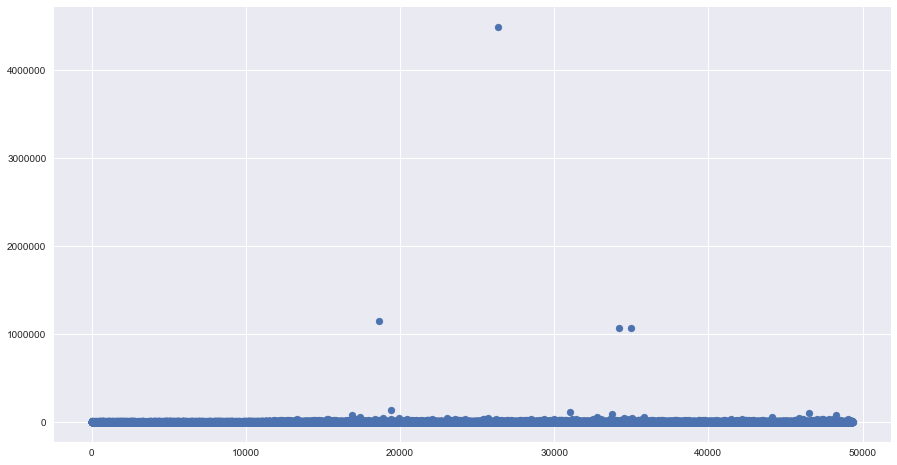

In [436]:
plt.figure(figsize=(15,8))
plt.scatter(range(result.shape[0]),result['price'])

In [437]:
ulimit = np.percentile(result.price.values, 99)
result['price'].ix[result['price']>ulimit] = ulimit

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app
C:\Anaconda\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


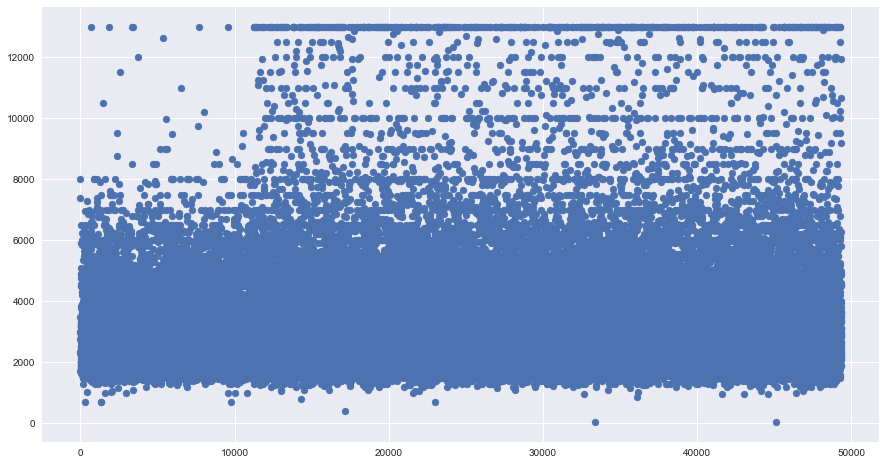

In [438]:
plt.figure(figsize=(15,8))
plt.scatter(range(result.shape[0]),result['price'])

In [439]:
result['int_level'] = result['interest_level'].map({'high': 1, 'low': 0})

In [440]:
#high_logit =smf.logit(formula = 'high ~ price', data = result).fit()
#high_logit.summary()

In [441]:
number=LabelEncoder()

In [442]:
#result['interest_level']=number.fit_transform(result['interest_level'].astype('str'))

In [443]:
#list(number.classes_)

In [444]:
#result.shape

In [445]:
result[result.isnull().any(axis=1)]

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,int_level


In [446]:
result.dtypes

interest_level      object
bedrooms             int64
bathrooms          float64
price              float64
display_address     object
features            object
photos              object
manager_id          object
int_level            int64
dtype: object

In [566]:
result.head(20000)

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,int_level
10,high,3,1.5,3000.0,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc,1
100014,high,4,2.0,7995.0,West 18th Street,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651,1
100026,high,1,1.0,1725.0,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f,1
100051,high,0,1.0,2350.0,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0,1
100063,high,2,1.0,2999.0,"E 30th St,","[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a,1
10007,high,4,2.0,7400.0,W 18 St.,"[Balcony, Doorman, Elevator, Fitness Center, T...",[https://photos.renthop.com/2/7120132_8e47916c...,0cff4a2a147d81e51ae8a91289e129f7,1
100075,high,1,1.0,2295.0,E 81st St.,"[Dishwasher, Hardwood Floors, No Fee]",[https://photos.renthop.com/2/6921632_563cdcee...,4f9b376a972b863bbfbdcdc8d717fa4e,1
100083,high,0,1.0,2750.0,250 West 88th Street,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",[https://photos.renthop.com/2/6904268_657c825a...,92ff104c90a9c40d153ea970e19c27c1,1
100084,high,2,1.0,3500.0,W 93 St.,"[Dining Room, Balcony, Doorman, Elevator, Terr...",[https://photos.renthop.com/2/6821944_b0efc094...,bce75205499f22e47b0c1aa94e09131c,1
10010,high,0,1.0,2396.0,W 34 St.,"[Roof Deck, Doorman, Elevator, Fitness Center,...",[https://photos.renthop.com/2/7230670_5757b0e5...,6a6c75bdb10af785bebd2a09a53fc4c2,1


In [567]:
#feature_list = result.features.values.tolist()
#feature_list_all = [item for sublist in feature_list for item in sublist]
#feature_list_all_norm = map(lambda x: "_".join(x.strip().split(" ")), feature_list_all)
#feature_list_all_norm_ = " ".join(feature_list_all_norm)


In [568]:
#from nltk import FreqDist

#fdist1 = FreqDist(feature_list_all_norm_.split())

# show most 10 frequent word in the text
#print (fdist1.most_common(10))

In [569]:
resulta=result.copy()

In [570]:
#Cleaning the display_address column
resulta['display_address']=resulta.display_address.map(lambda x: " ".join(x.strip("-,.$*!#&\'\t").replace("'",'').lower()\
                                                                         .replace('street', 'st').replace('avenue', 'ave')\
                                                                         .replace('east', 'e').replace('west', 'w').split()))


In [571]:
#Converting display address into numerical value
resulta['display_address']=number.fit_transform(resulta['display_address'].astype('str'))

In [572]:
enc=OneHotEncoder()

In [573]:
enc.fit_transform(resulta['display_address'])

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


<1x49352 sparse matrix of type '<class 'numpy.float64'>'
	with 49352 stored elements in Compressed Sparse Row format>

In [575]:
resulta.head()

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,int_level
10,high,3,1.5,3000.0,4912,[],[https://photos.renthop.com/2/7211212_1ed4542e...,5ba989232d0489da1b5f2c45f6688adc,1
100014,high,4,2.0,7995.0,5771,[],[https://photos.renthop.com/2/6894514_9abb8592...,b209e2c4384a64cc307c26759ee0c651,1
100026,high,1,1.0,1725.0,4621,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",[https://photos.renthop.com/2/6898799_3759be4c...,c1a6598437b7db560cde66e5a297a53f,1
100051,high,0,1.0,2350.0,3951,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/6889043_a3e1c004...,dbbb6b990661b1e507a387f019bcb1a0,1
100063,high,2,1.0,2999.0,3932,"[Elevator, Central A/C, Walk in Closet(s), Par...",[https://photos.renthop.com/2/6836760_6edeb636...,e6472c7237327dd3903b3d6f6a94515a,1


In [576]:
#resulta['feat_score'] = resulta["features"].apply(lambda x: " ".join(["_".join(i.split(" ")) for i in x]))

In [577]:
#resulta.head()

In [578]:
#len(resulta['feat_score'].unique())

In [579]:
#resulta['feat_score'].astype(str)

In [580]:
#len(resulta['feat_score'].unique())

In [581]:
#tfidf = CountVectorizer(stop_words='english', max_features=200)
#tr_sparse  = tfidf.fit_transform(resulta["feat_score"])

In [582]:
#sklearn_tfidf = TfidfVectorizer()

In [583]:
#resulta['feat_score'] = sklearn_tfidf.fit_transform(tr_sparse )

In [584]:
#Determining the count of features
resulta['feat_count']=resulta['features'].apply(len)

In [585]:
#Determining the count of photos
resulta['photos']=resulta['photos'].apply(len)

In [586]:
#Finding number of unique manager id
len(resulta['manager_id'].unique())

3481

In [587]:
temp1 = result.groupby('manager_id').count().iloc[:,-1].sort_values(ascending=False)

In [588]:
manager_df=pd.DataFrame(temp1)

In [589]:
manager_df.columns=['train_counts']

In [590]:
manager_df

,train_counts
manager_id,
e6472c7237327dd3903b3d6f6a94515a,2533
6e5c10246156ae5bdcd9b487ca99d96a,711
8f5a9c893f6d602f4953fcc0b8e6e9b4,410
62b685cc0d876c3a1a51d63a0d6a8082,402
cb87dadbca78fad02b388dc9e8f25a5b,373
9df32cb8dda19d3222d66e69e258616b,330
b7de4cb395920136663132057fa89d84,320
2aa9bfa5f67ed9997ea341dee8a3a271,316
ad3d8ddc52c7e0859b5c6c7f7949c3bd,305


In [591]:
len(manager_df[manager_df['train_counts']==1])

969

In [592]:
ix20 = int(len(manager_df['train_counts'].dropna())*0.2)
print("TRAIN: 20% of managers ({0}) responsible for {1:2.2f}% of entries".format(ix20,manager_df['train_counts'].sort_values(ascending = False).cumsum().iloc[ix20]/manager_df['train_counts'].sum()*100))

TRAIN: 20% of managers (696) responsible for 76.16% of entries


In [593]:
resulta['manager_id']=number.fit_transform(resulta['manager_id'].astype('str'))

In [594]:
enc=OneHotEncoder()

In [595]:
enc.fit_transform(resulta['manager_id']).toarray()

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [596]:
#tokenize = lambda doc: doc.lower().split(" ")

In [597]:
#sklearn_tfidf = TfidfVectorizer()

In [598]:
#resulta['feat_score'] = sklearn_tfidf.fit_transform(resulta['features'])

### The Features that we are using are:
    
Bedrooms:

Bathrooms

Price

Display_address

Number of Features

Number of photos

Manager ID

Feature dummy variables

In [789]:
resulta.head(30)

,interest_level,features,int_level,bedrooms,bathrooms,price,display_address,photos,manager_id,feat_count,...,roof_deck,laundry_in_unit,garden_patio,loft,common_outdoor_space,wheelchair_access,swimming_pool,new_construction,hardwood,prewar
10,high,[],1,3,1.5,3000.0,4912,5,1239,0,...,0,0,0,0,0,0,0,0,0,0
100014,high,[],1,4,2.0,7995.0,5771,5,2443,0,...,0,0,0,0,0,0,0,0,0,0
100026,high,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",1,1,1.0,1725.0,4621,5,2653,4,...,0,0,0,0,0,0,0,0,0,0
100051,high,"[Doorman, Elevator, Fitness Center, Laundry in...",1,0,1.0,2350.0,3951,2,3003,5,...,0,0,0,0,0,0,0,0,0,0
100063,high,"[Elevator, Central A/C, Walk in Closet(s), Par...",1,2,1.0,2999.0,3932,5,3135,9,...,0,0,0,0,0,0,0,0,0,0
10007,high,"[Balcony, Doorman, Elevator, Fitness Center, T...",1,4,2.0,7400.0,5752,6,179,12,...,0,0,0,0,0,0,0,0,0,0
100075,high,"[Dishwasher, Hardwood Floors, No Fee]",1,1,1.0,2295.0,4207,6,1089,3,...,0,0,0,0,0,0,0,0,0,0
100083,high,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",1,0,1.0,2750.0,1300,4,2011,6,...,0,0,0,0,0,0,0,0,0,0
100084,high,"[Dining Room, Balcony, Doorman, Elevator, Terr...",1,2,1.0,3500.0,6096,8,2590,13,...,0,0,0,0,0,0,0,0,0,0
10010,high,"[Roof Deck, Doorman, Elevator, Fitness Center,...",1,0,1.0,2396.0,5847,4,1446,14,...,1,1,0,0,0,0,0,0,0,0


In [602]:
x = resulta['features'].tolist()

feature_list = []

for i in range(0,len(x),6169):
    print(i+6169)
    feature_listadd = []
    for j in range(i,i+6169):#len(x)):
        feature_listadd = feature_listadd + x[j]
    feature_list = feature_list + feature_listadd
    
#lowercase is necessary, otherwise matches will be missed when there are differences in case
feature_list = [item.lower() for item in feature_list]
cl = Counter(feature_list)

6169
12338
18507
24676
30845
37014
43183
49352


In [603]:
#Keeping features that occur at least 1,000 times 

feature_list = []

for key in cl:
    if cl[key]>1000:
        feature_list.append(key)
        print(key)

feature_list

cats allowed
dogs allowed
elevator
laundry in building
doorman
fitness center
no fee
hardwood floors
balcony
terrace
high speed internet
dishwasher
outdoor space
pre-war
exclusive
dining room
roof deck
laundry in unit
garden/patio
loft
common outdoor space
wheelchair access
swimming pool
new construction
hardwood
prewar


['cats allowed',
 'dogs allowed',
 'elevator',
 'laundry in building',
 'doorman',
 'fitness center',
 'no fee',
 'hardwood floors',
 'balcony',
 'terrace',
 'high speed internet',
 'dishwasher',
 'outdoor space',
 'pre-war',
 'exclusive',
 'dining room',
 'roof deck',
 'laundry in unit',
 'garden/patio',
 'loft',
 'common outdoor space',
 'wheelchair access',
 'swimming pool',
 'new construction',
 'hardwood',
 'prewar']

### Creating dummy variables for features

In [605]:
for i in feature_list:
    resulta[i] = resulta['features'][:resulta.shape[0]].apply \
        (lambda x: 1 if i in [y.lower() for y in x] else 0)

In [606]:
#temp = pd.get_dummies(result.interest_level)
#temp = pd.concat([resulta.manager_id, temp], axis=1).groupby(resulta['manager_id']).mean()
#temp.columns = ['manager_id','high_frac','low_frac']
#temp['manager_skill'] = temp['high_frac']*2 + temp['medium_frac'] + temp['low_frac']*0.2
#temp.index = temp.manager_id
#del temp['manager_id']

In [607]:
#temp.head()

In [608]:
#resulta=pd.get_dummies(resulta, columns=["manager_id"])

In [609]:
resulta

,interest_level,bedrooms,bathrooms,price,display_address,features,photos,manager_id,int_level,feat_count,...,roof deck,laundry in unit,garden/patio,loft,common outdoor space,wheelchair access,swimming pool,new construction,hardwood,prewar
10,high,3,1.5,3000.0,4912,[],5,1239,1,0,...,0,0,0,0,0,0,0,0,0,0
100014,high,4,2.0,7995.0,5771,[],5,2443,1,0,...,0,0,0,0,0,0,0,0,0,0
100026,high,1,1.0,1725.0,4621,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",5,2653,1,4,...,0,0,0,0,0,0,0,0,0,0
100051,high,0,1.0,2350.0,3951,"[Doorman, Elevator, Fitness Center, Laundry in...",2,3003,1,5,...,0,0,0,0,0,0,0,0,0,0
100063,high,2,1.0,2999.0,3932,"[Elevator, Central A/C, Walk in Closet(s), Par...",5,3135,1,9,...,0,0,0,0,0,0,0,0,0,0
10007,high,4,2.0,7400.0,5752,"[Balcony, Doorman, Elevator, Fitness Center, T...",6,179,1,12,...,0,0,0,0,0,0,0,0,0,0
100075,high,1,1.0,2295.0,4207,"[Dishwasher, Hardwood Floors, No Fee]",6,1089,1,3,...,0,0,0,0,0,0,0,0,0,0
100083,high,0,1.0,2750.0,1300,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",4,2011,1,6,...,0,0,0,0,0,0,0,0,0,0
100084,high,2,1.0,3500.0,6096,"[Dining Room, Balcony, Doorman, Elevator, Terr...",8,2590,1,13,...,0,0,0,0,0,0,0,0,0,0
10010,high,0,1.0,2396.0,5847,"[Roof Deck, Doorman, Elevator, Fitness Center,...",4,1446,1,14,...,1,1,0,0,0,0,0,0,0,0


In [610]:
cols=list(resulta)

In [611]:
cols.insert(1, cols.pop(cols.index('int_level')))
cols

['interest_level',
 'int_level',
 'bedrooms',
 'bathrooms',
 'price',
 'display_address',
 'features',
 'photos',
 'manager_id',
 'feat_count',
 'cats allowed',
 'dogs allowed',
 'elevator',
 'laundry in building',
 'doorman',
 'fitness center',
 'no fee',
 'hardwood floors',
 'balcony',
 'terrace',
 'high speed internet',
 'dishwasher',
 'outdoor space',
 'pre-war',
 'exclusive',
 'dining room',
 'roof deck',
 'laundry in unit',
 'garden/patio',
 'loft',
 'common outdoor space',
 'wheelchair access',
 'swimming pool',
 'new construction',
 'hardwood',
 'prewar']

In [617]:
cols.insert(1, cols.pop(cols.index('features')))
cols

['interest_level',
 'features',
 'int_level',
 'bedrooms',
 'bathrooms',
 'price',
 'display_address',
 'photos',
 'manager_id',
 'feat_count',
 'cats allowed',
 'dogs allowed',
 'elevator',
 'laundry in building',
 'doorman',
 'fitness center',
 'no fee',
 'hardwood floors',
 'balcony',
 'terrace',
 'high speed internet',
 'dishwasher',
 'outdoor space',
 'pre-war',
 'exclusive',
 'dining room',
 'roof deck',
 'laundry in unit',
 'garden/patio',
 'loft',
 'common outdoor space',
 'wheelchair access',
 'swimming pool',
 'new construction',
 'hardwood',
 'prewar']

In [618]:
resulta = resulta.ix[:, cols]
resulta

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


,interest_level,features,int_level,bedrooms,bathrooms,price,display_address,photos,manager_id,feat_count,...,roof deck,laundry in unit,garden/patio,loft,common outdoor space,wheelchair access,swimming pool,new construction,hardwood,prewar
10,high,[],1,3,1.5,3000.0,4912,5,1239,0,...,0,0,0,0,0,0,0,0,0,0
100014,high,[],1,4,2.0,7995.0,5771,5,2443,0,...,0,0,0,0,0,0,0,0,0,0
100026,high,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",1,1,1.0,1725.0,4621,5,2653,4,...,0,0,0,0,0,0,0,0,0,0
100051,high,"[Doorman, Elevator, Fitness Center, Laundry in...",1,0,1.0,2350.0,3951,2,3003,5,...,0,0,0,0,0,0,0,0,0,0
100063,high,"[Elevator, Central A/C, Walk in Closet(s), Par...",1,2,1.0,2999.0,3932,5,3135,9,...,0,0,0,0,0,0,0,0,0,0
10007,high,"[Balcony, Doorman, Elevator, Fitness Center, T...",1,4,2.0,7400.0,5752,6,179,12,...,0,0,0,0,0,0,0,0,0,0
100075,high,"[Dishwasher, Hardwood Floors, No Fee]",1,1,1.0,2295.0,4207,6,1089,3,...,0,0,0,0,0,0,0,0,0,0
100083,high,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",1,0,1.0,2750.0,1300,4,2011,6,...,0,0,0,0,0,0,0,0,0,0
100084,high,"[Dining Room, Balcony, Doorman, Elevator, Terr...",1,2,1.0,3500.0,6096,8,2590,13,...,0,0,0,0,0,0,0,0,0,0
10010,high,"[Roof Deck, Doorman, Elevator, Fitness Center,...",1,0,1.0,2396.0,5847,4,1446,14,...,1,1,0,0,0,0,0,0,0,0


In [716]:
resulta.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
resulta.rename(columns=lambda x: x.strip().replace("/", "_"), inplace=True)
resulta.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)

In [717]:
resulta.describe()

,int_level,bedrooms,bathrooms,price,display_address,photos,manager_id,feat_count,cats_allowed,dogs_allowed,...,roof_deck,laundry_in_unit,garden_patio,loft,common_outdoor_space,wheelchair_access,swimming_pool,new_construction,hardwood,prewar
count,49352.000000,49352.000000,49352.00000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,...,49352.000000,49352.000000,49352.000000,49352.000000,49352.00000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000
mean,0.305317,1.541640,1.21218,3608.801001,4389.049400,5.606946,1783.531995,5.428473,0.476982,0.446486,...,0.132821,0.189354,0.039370,0.042572,0.02620,0.027517,0.055317,0.052845,0.021438,0.027334
std,0.460546,1.115018,0.50142,1848.993853,1417.818282,3.632283,1006.158397,3.923411,0.499475,0.497133,...,0.339385,0.391794,0.194476,0.201892,0.15973,0.163585,0.228600,0.223726,0.144840,0.163057
min,0.000000,0.000000,0.00000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.00000,2500.000000,3837.000000,4.000000,886.750000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.00000,3150.000000,4290.000000,5.000000,1788.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.00000,4100.000000,5627.000000,7.000000,2731.000000,8.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,8.000000,10.00000,13000.000000,6330.000000,68.000000,3480.000000,39.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [718]:
resulta.dtypes


interest_level           object
features                 object
int_level                 int64
bedrooms                  int64
bathrooms               float64
price                   float64
display_address           int64
photos                    int64
manager_id                int64
feat_count                int64
cats_allowed              int64
dogs_allowed              int64
elevator                  int64
laundry_in_building       int64
doorman                   int64
fitness_center            int64
no_fee                    int64
hardwood_floors           int64
balcony                   int64
terrace                   int64
high_speed_internet       int64
dishwasher                int64
outdoor_space             int64
pre_war                   int64
exclusive                 int64
dining_room               int64
roof_deck                 int64
laundry_in_unit           int64
garden_patio              int64
loft                      int64
common_outdoor_space      int64
wheelcha

In [689]:
#manager_count=resulta['manager_id'].value_counts()

In [690]:
#plt.figure(figsize=(15,10))
#sns.barplot(manager_count.index,manager_count.values)
#plt.title("Frequency of managers", fontsize=15)
#plt.ylabel("Frequency", fontsize=12)
#plt.xlabel("manager_id", fontsize=12)
#plt.show()

In [691]:
#top10managers = resulta.manager_id.value_counts().nlargest(10).index.tolist()

In [692]:
#fig = plt.figure(figsize=(12,6))
#ax = sns.countplot(x="manager_id", hue="interest_level",
 #                  data=resulta[resulta.manager_id.isin(top10managers)])

In [693]:
train=resulta.columns[3:-1]

In [694]:
train

Index(['bedrooms', 'bathrooms', 'price', 'display_address', 'photos',
       'manager_id', 'feat_count', 'cats_allowed', 'dogs_allowed', 'elevator',
       'laundry_in_building', 'doorman', 'fitness_center', 'no_fee',
       'hardwood_floors', 'balcony', 'terrace', 'high_speed_internet',
       'dishwasher', 'outdoor_space', 'pre-war', 'exclusive', 'dining_room',
       'roof_deck', 'laundry_in_unit', 'garden/patio', 'loft',
       'common_outdoor_space', 'wheelchair_access', 'swimming_pool',
       'new_construction', 'hardwood'],
      dtype='object')

In [695]:
logit = sm.Logit(resulta['int_level'], resulta[train])

In [696]:
final=logit.fit()

Optimization terminated successfully.
         Current function value: 0.525810
         Iterations 7


In [697]:
final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              int_level   No. Observations:                49352
Model:                          Logit   Df Residuals:                    49320
Method:                           MLE   Df Model:                           31
Date:                Tue, 23 May 2017   Pseudo R-squ.:                  0.1454
Time:                        01:31:45   Log-Likelihood:                -25950.
converged:                       True   LL-Null:                       -30366.
                                        LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms                 0.5565      0.014     40.403      0.000       0.530       0.584
bathrooms                0.4630      0.034     13.682      0.000       0.397       0.529
price                   -0.0009   1.52e-05    -58.872      0.000      -0.001      -0.001
display_address      -2.357e-05   6.38e-06     -3.693      0.000   -3.61e-05   -1.11e-05
photos                   0.0314      0.003      9.737      0.000       0.025       0.038
manager_id            2.313e-05   9.94e-06      2.326      0.020    3.64e-06    4.26e-05
feat_count               0.0702      0.010      7.372      0.000       0.052       0.089
cats_allowed             0.0088      0.060      0.148      0.883      -0.108       0.126
dogs_allowed            -0.1930      0.061     -3.174      0.002      -0.312      -0.074
elevator                -0.0046      0.032     -0.142      0.887      -0.068       0.059
laundry_in_building      0.3426      0.031     10.977      0.000       0.281       0.404
doorman                 -0.2402      0.035     -6.810      0.000      -0.309      -0.171
fitness_center          -0.3129      0.039     -7.953      0.000      -0.390      -0.236
no_fee                   0.5153      0.027     19.007      0.000       0.462       0.568
hardwood_floors          0.3553      0.030     11.802      0.000       0.296       0.414
balcony                 -0.0320      0.053     -0.599      0.549      -0.137       0.073
terrace                 -0.0265      0.063     -0.421      0.673      -0.150       0.097
high_speed_internet      0.1450      0.047      3.079      0.002       0.053       0.237
dishwasher               0.0302      0.032      0.954      0.340      -0.032       0.092
outdoor_space            0.0704      0.043      1.640      0.101      -0.014       0.154
pre-war                 -0.3370      0.030    -11.256      0.000      -0.396      -0.278
exclusive                0.0887      0.056      1.570      0.116      -0.022       0.199
dining_room              0.0690      0.040      1.746      0.081      -0.008       0.146
roof_deck               -0.1246      0.042     -2.991      0.003      -0.206      -0.043
laundry_in_unit          0.1813      0.033      5.578      0.000       0.118       0.245
garden/patio            -0.0384      0.063     -0.609      0.543      -0.162       0.085
loft                     0.2900      0.053      5.453      0.000       0.186       0.394
common_outdoor_space     0.4757      0.072      6.580      0.000       0.334       0.617
wheelchair_access       -0.0561      0.073     -0.771      0.441      -0.199       0.087
swimming_pool           -0.0012      0.052     -0.023      0.982      -0.104       0.101
new_construction        -0.2294      0.055     -4.176      0.000      -0.337      -0.122
hardwood                -1.8920      0.101    -18.722      0.000      -2.090      -1.694
========================================================================================
"""

In [698]:
resulta.groupby('interest_level').mean()


,int_level,bedrooms,bathrooms,price,display_address,photos,manager_id,feat_count,cats_allowed,dogs_allowed,...,roof_deck,laundry_in_unit,garden/patio,loft,common_outdoor_space,wheelchair_access,swimming_pool,new_construction,hardwood,prewar
interest_level,,,,,,,,,,,,,,,,,,,,,
high,1.0,1.602801,1.151745,3034.962702,4206.565171,5.794200,1789.083687,5.702681,0.429586,0.395009,...,0.146602,0.208057,0.048115,0.048978,0.032785,0.030329,0.056743,0.059862,0.013671,0.010685
low,0.0,1.514759,1.238741,3861.005979,4469.252188,5.524647,1781.091996,5.307957,0.497812,0.469111,...,0.126765,0.181134,0.035527,0.039756,0.023305,0.026280,0.054690,0.049761,0.024851,0.034652


### Performing Logistic regression using sklearn

In [643]:
from sklearn.preprocessing import scale

In [719]:
y, X = dmatrices('int_level ~  +bedrooms + bathrooms + price + display_address + photos + manager_id + feat_count + cats_allowed + dogs_allowed + elevator + laundry_in_building + doorman + fitness_center + no_fee +  hardwood_floors + balcony + terrace + high_speed_internet + dishwasher + outdoor_space + prewar + exclusive + dining_room + roof_deck + laundry_in_unit + garden_patio + loft + common_outdoor_space + wheelchair_access + swimming_pool + new_construction + hardwood' , resulta, return_type="dataframe")

In [706]:
resulta.columns[3:-1]

Index(['bedrooms', 'bathrooms', 'price', 'display_address', 'photos',
       'manager_id', 'feat_count', 'cats_allowed', 'dogs_allowed', 'elevator',
       'laundry_in_building', 'doorman', 'fitness_center', 'no_fee',
       'hardwood_floors', 'balcony', 'terrace', 'high_speed_internet',
       'dishwasher', 'outdoor_space', 'pre-war', 'exclusive', 'dining_room',
       'roof_deck', 'laundry_in_unit', 'garden/patio', 'loft',
       'common_outdoor_space', 'wheelchair_access', 'swimming_pool',
       'new_construction', 'hardwood'],
      dtype='object')

In [720]:
y = np.ravel(y)

In [721]:
model = LogisticRegression(penalty='l2',C=.01,fit_intercept = True)
model = model.fit(X, y)

#### What are the coefficients?

In [722]:
#examine the coefficients
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[0.14799515923]
1,bedrooms,[0.485726927347]
2,bathrooms,[0.262430068361]
3,price,[-0.000808426456031]
4,display_address,[-6.87164804249e-05]
5,photos,[0.0320529396383]
6,manager_id,[1.95153705018e-05]
7,feat_count,[0.0307505498447]
8,cats_allowed,[-0.110637824316]
9,dogs_allowed,[-0.141643410985]


In [723]:
#price=result['price']

In [724]:
#X=pd.DataFrame(price) 
#y=result['interest_level']

In [725]:
model.fit(X,y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [726]:
model.intercept_

array([ 0.14799516])

In [727]:
model.coef_

array([[  1.47995159e-01,   4.85726927e-01,   2.62430068e-01,
         -8.08426456e-04,  -6.87164804e-05,   3.20529396e-02,
          1.95153705e-05,   3.07505498e-02,  -1.10637824e-01,
         -1.41643411e-01,   4.81973898e-02,   2.66587038e-01,
         -1.17751002e-01,  -1.20711385e-01,   4.34865319e-01,
          4.05772237e-01,   2.52563172e-02,   2.70817988e-02,
          1.71426211e-02,   1.41627119e-01,   8.93127216e-02,
         -2.35109921e-01,   3.24317048e-02,   8.80123668e-02,
         -4.71981829e-02,   1.65651338e-01,   2.01732299e-02,
          8.39850880e-02,   7.81588179e-02,  -1.36151334e-02,
         -4.81226818e-03,  -3.40448497e-02,  -2.13279137e-01]])

In [728]:
#preds=model.predict(X=pd.DataFrame(price))

In [729]:
#preds

In [730]:
#model.score(X,y)

In [731]:
#train_features=pd.DataFrame([result['bedrooms'],result['bathrooms'],result['price']]).T

In [732]:
# Initialize logistic regression model
#modela = LogisticRegression()

In [733]:
#modela.fit(X= train_features,y=result['interest_level'])

In [734]:
#modela.intercept_

In [735]:
#modela.coef_

### Model evaluation using validation set

In [736]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [737]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print (predicted)

[ 1.  0.  0. ...,  1.  0.  0.]


In [738]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print (probs)

[[ 0.41488551  0.58511449]
 [ 0.73256926  0.26743074]
 [ 0.68629251  0.31370749]
 ..., 
 [ 0.48619946  0.51380054]
 [ 0.80707362  0.19292638]
 [ 0.7801203   0.2198797 ]]


In [739]:
# generate evaluation metrics
#print (metrics.accuracy_score(y_test, predicted))
#print (metrics.roc_auc_score(y_test, probs[:, 1]))

In [740]:
#result1=result[result['int_level']==0]

In [741]:
#result1.head()

In [742]:
#y, X = dmatrices('int_level ~ bedrooms + bathrooms + price', result1, return_type="dataframe")

In [743]:
#X.columns

In [744]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#model2c = linear_model.LinearRegression()
#model2c.fit(X_train, y_train)

In [745]:
#predicted1 = model2c.predict(X_test)

In [746]:
#print (metrics.accuracy_score(y_test, predicted1))

### Confusion Matrix for Logistic Regression

In [747]:
#Confusion matrix
print (metrics.confusion_matrix(y_test, predicted))
print (metrics.classification_report(y_test, predicted))

[[9562  706]
 [3490 1048]]
             precision    recall  f1-score   support

        0.0       0.73      0.93      0.82     10268
        1.0       0.60      0.23      0.33      4538

avg / total       0.69      0.72      0.67     14806



The Average precision is : 69%

The Average Recall is : 72%
    
The average F1-score is : 67%

Thus the scores have increased after creating dummy variables as compared to before score as below

For the Logistic Regression model,the scores before dummy variables are as follows

Average Precision : 66%
    
Average Recall:  70%
    
Average F1-score:  64%

### Model evaluation using cross validation

In [748]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[ 0.71069692  0.70623987  0.72102917  0.71333063  0.71793313  0.71509625
  0.71935157  0.74285714  0.75374949  0.74017025]
0.724045443225


In [749]:
#data1a=result.copy()

In [750]:
#data1a.head()

In [751]:
#data1a['display_address']=number.fit_transform(data1a['display_address'].astype('str'))

### Support vector machine(SVM)

In [752]:
resulta.head(10)

,interest_level,features,int_level,bedrooms,bathrooms,price,display_address,photos,manager_id,feat_count,...,roof_deck,laundry_in_unit,garden_patio,loft,common_outdoor_space,wheelchair_access,swimming_pool,new_construction,hardwood,prewar
10,high,[],1,3,1.5,3000.0,4912,5,1239,0,...,0,0,0,0,0,0,0,0,0,0
100014,high,[],1,4,2.0,7995.0,5771,5,2443,0,...,0,0,0,0,0,0,0,0,0,0
100026,high,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",1,1,1.0,1725.0,4621,5,2653,4,...,0,0,0,0,0,0,0,0,0,0
100051,high,"[Doorman, Elevator, Fitness Center, Laundry in...",1,0,1.0,2350.0,3951,2,3003,5,...,0,0,0,0,0,0,0,0,0,0
100063,high,"[Elevator, Central A/C, Walk in Closet(s), Par...",1,2,1.0,2999.0,3932,5,3135,9,...,0,0,0,0,0,0,0,0,0,0
10007,high,"[Balcony, Doorman, Elevator, Fitness Center, T...",1,4,2.0,7400.0,5752,6,179,12,...,0,0,0,0,0,0,0,0,0,0
100075,high,"[Dishwasher, Hardwood Floors, No Fee]",1,1,1.0,2295.0,4207,6,1089,3,...,0,0,0,0,0,0,0,0,0,0
100083,high,"[Doorman, Elevator, Pre-War, Exclusive, Dogs A...",1,0,1.0,2750.0,1300,4,2011,6,...,0,0,0,0,0,0,0,0,0,0
100084,high,"[Dining Room, Balcony, Doorman, Elevator, Terr...",1,2,1.0,3500.0,6096,8,2590,13,...,0,0,0,0,0,0,0,0,0,0
10010,high,"[Roof Deck, Doorman, Elevator, Fitness Center,...",1,0,1.0,2396.0,5847,4,1446,14,...,1,1,0,0,0,0,0,0,0,0


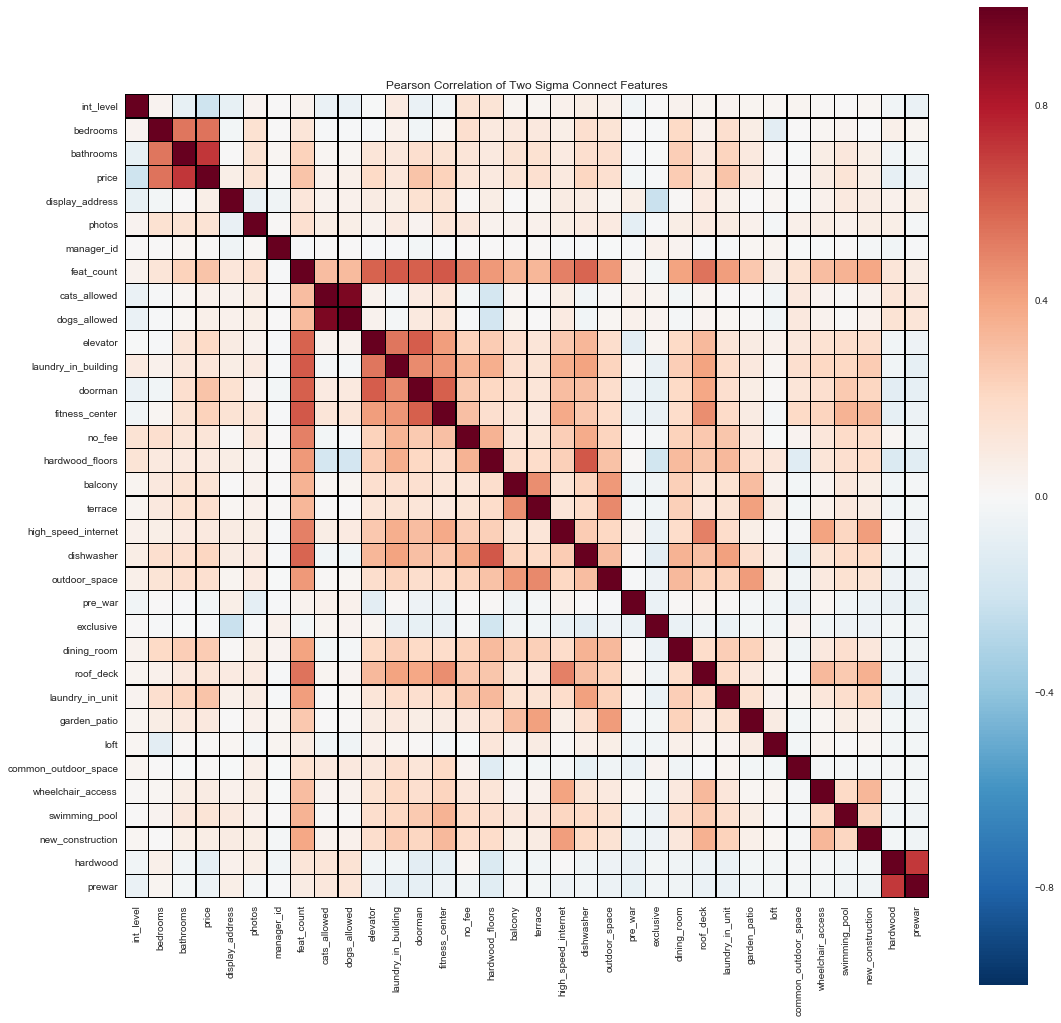

In [753]:
#Creating 
plt.figure(figsize=(18, 18))
plt.title('Pearson Correlation of Two Sigma Connect Features')
# Draw the heatmap using seaborn
sns.heatmap(resulta.corr(), linewidths=0.25, vmax=1.0, square=True , linecolor='black')

In [790]:
#datab=['interest_level','bedrooms','bathrooms','price','display_address','features','photos','manager_id','int_level']
#trainb=resulta[datab]


In [791]:
#trainb.head(5)

In [792]:
#trainb['features']

In [793]:
#trainb['display_address']=trainb.display_address.map(lambda x: " ".join(x.strip("-,.$*!#&\'\t").replace("'",'').lower()\
                                                                        # .replace('street', 'st').replace('avenue', 'ave')\
                                                                         #.replace('east', 'e').replace('west', 'w').split()))

In [210]:
#a=trainb['display_address']
#len(a.unique())


6331

In [794]:
#trainb

In [212]:
#trainb['display_address']=number.fit_transform(trainb['display_address'].astype('str'))

In [213]:
#trainb.shape


(49352, 9)

In [754]:
y, X = dmatrices('int_level ~  +bedrooms + bathrooms + price + display_address + photos + manager_id + feat_count + cats_allowed + dogs_allowed + elevator + laundry_in_building + doorman + fitness_center + no_fee +  hardwood_floors + balcony + terrace + high_speed_internet + dishwasher + outdoor_space + prewar + exclusive + dining_room + roof_deck + laundry_in_unit + garden_patio + loft + common_outdoor_space + wheelchair_access + swimming_pool + new_construction + hardwood' , resulta, return_type="dataframe")

In [755]:
X.columns

Index(['Intercept', 'bedrooms', 'bathrooms', 'price', 'display_address',
       'photos', 'manager_id', 'feat_count', 'cats_allowed', 'dogs_allowed',
       'elevator', 'laundry_in_building', 'doorman', 'fitness_center',
       'no_fee', 'hardwood_floors', 'balcony', 'terrace',
       'high_speed_internet', 'dishwasher', 'outdoor_space', 'prewar',
       'exclusive', 'dining_room', 'roof_deck', 'laundry_in_unit',
       'garden_patio', 'loft', 'common_outdoor_space', 'wheelchair_access',
       'swimming_pool', 'new_construction', 'hardwood'],
      dtype='object')

In [756]:
from sklearn import svm

In [757]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [758]:
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)

In [759]:
modelsvm = svm.LinearSVC(class_weight='balanced')

In [760]:
modelsvm.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [761]:
modelsvm.intercept_

array([ 0.03409265])

In [762]:
modelsvm.coef_

array([[  3.40926521e-02,   1.24166879e-01,   4.90809024e-02,
         -3.82012021e-05,  -1.83460185e-04,   2.05925997e-02,
         -2.24360288e-04,   2.70994383e-02,  -1.28811007e-02,
         -1.65262044e-02,  -3.52730925e-03,   2.00205366e-02,
         -2.27474867e-02,  -1.65688137e-02,   4.43755373e-02,
          4.10974982e-02,   4.31205496e-03,   3.51928424e-03,
          4.84979957e-03,   1.75031634e-02,   1.04638744e-02,
         -1.34548801e-02,   4.17701497e-03,   9.53066661e-03,
         -2.14012660e-04,   1.23554945e-02,   3.74662041e-03,
          2.72597489e-03,   3.47907107e-03,  -5.41841919e-04,
          3.59280424e-04,  -1.15907411e-04,  -1.12561411e-02]])

In [763]:
#For prediction
ypred=modelsvm.predict(X_test)

In [764]:
#from sklearn.metrics import f1_score

In [765]:
#print (metrics.accuracy_score(y_test, ypred))

### Confusion Matrix for Linear SVM

In [766]:
#Confusiion Matrix
print (metrics.confusion_matrix(y_test, ypred))
print (metrics.classification_report(y_test, ypred))

[[9912  356]
 [4253  285]]
             precision    recall  f1-score   support

        0.0       0.70      0.97      0.81     10268
        1.0       0.44      0.06      0.11      4538

avg / total       0.62      0.69      0.60     14806



The score after creating dummy variables:
    
Precision: 62%
    
Recall : 69%
    
F1-score : 60%

 The Average scores for Linear SVM model before dummy variables:

Precision: 48%
    
Recall: 69%
    
F1-score:  57%

### Using RBF Kernel in SVM

In [767]:
#with rbf kernel
svmrbf = svm.SVC(class_weight='balanced')

In [768]:
svmrbf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [769]:
ypred1=svmrbf.predict(X_test)

In [771]:
print (metrics.confusion_matrix(y_test, ypred1))
print (metrics.classification_report(y_test, ypred1))

[[9922  346]
 [3835  703]]
             precision    recall  f1-score   support

        0.0       0.72      0.97      0.83     10268
        1.0       0.67      0.15      0.25      4538

avg / total       0.71      0.72      0.65     14806



The average score for SVM model with RBF kernel is:
    
Average Precision: 71%
    
Average Recall:  72%
    
Average F1-score: 65%

In [773]:
#print (metrics.accuracy_score(y_test, ypred1))

In [774]:
#f1_score(y_test,ypred1)

In [775]:
#feature_list = result.features.values.tolist()
#feature_list_all = [item for sublist in feature_list for item in sublist]
#feature_list_all_norm = map(lambda x: "_".join(x.strip().split(" ")), feature_list_all)
#feature_list_all_norm_ = " ".join(feature_list_all_norm)

In [776]:
#result.head(10)

In [795]:
#datac=resulta.copy()

In [779]:
#trainc['display_address']=number.fit_transform(trainc['display_address'].astype('str'))

In [780]:
#trainc['features']=trainc['features'].apply(len)

In [788]:
#atac

### Implementing XGBoost Model

In [782]:
import xgboost as xgb

In [783]:
from xgboost import XGBClassifier

In [784]:
XGB = xgb.XGBClassifier()

In [785]:
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [786]:
ypred3 = XGB.predict(X_test)

### Confusion Matrix

In [787]:
print (metrics.confusion_matrix(y_test, ypred3))
print (metrics.classification_report(y_test, ypred3))

[[9370  898]
 [2769 1769]]
             precision    recall  f1-score   support

        0.0       0.77      0.91      0.84     10268
        1.0       0.66      0.39      0.49      4538

avg / total       0.74      0.75      0.73     14806



The average score for XGBoost model after dummt variables:
    
Precision: 74%
    
Recall: 75%
    
F1-score: 73%

The average scores for XGBoost model before dummy variables:
    
Average precision: 71%
    
Average Recall:  73%
    
Average F1-score:  70%
    


In [245]:
#Accuracy score
#print (metrics.accuracy_score(y_test, ypred3))